In [1]:
import os, sys
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
file = '20191204_peptide_aptamer_pairs_correct.csv'

## General metrics about the file

In [3]:
# Generate a dictionary from peptide --> [(aptamer, read count)]
all_aptamers = []
dataset = {}
with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            peptide = row[0]
            aptamer = row[1]
            # Controls
            if "RRRRRR" in peptide:
                continue
            if aptamer == "CTTTGTAATTGGTTCTGAGTTCCGTTGTGGGAGGAACATG":
                continue
            if len(aptamer) < 40:
                continue
            rc = row[2]
            
            # Reformat the peptide
            if '_' in peptide:
                split = peptide.split('_')
                save = split[0]
                if len(save) < 8:
                    continue
                peptide = save 
            # Only look at length-8 peptides
            if len(peptide) < 8:
                continue
            
            if peptide not in dataset.keys():
                dataset[peptide] = []
            dataset[peptide].append((aptamer, rc))
            all_aptamers.append(aptamer)
        line_count += 1
    print("Number of lines: ", line_count)

Column names are Peptide, Aptamer, Read Count
Number of lines:  770226


In [4]:
print(str(len(dataset.keys())))
peptides = list(dataset.keys())
lengths = [len(p) for p in peptides]
for i in range(3, 9):
    print("count of ", i, ":", lengths.count(i))

435570
count of  3 : 0
count of  4 : 0
count of  5 : 0
count of  6 : 0
count of  7 : 0
count of  8 : 435570


## Split the dataset into binding affinity groups

Affinity Groups:  [22448, 35690, 123818, 588269]


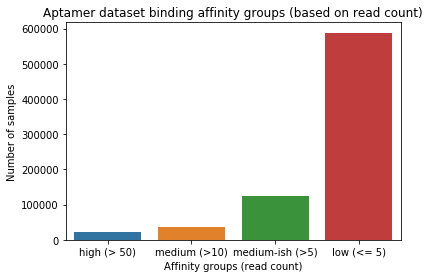

In [5]:
affinity_groups = [0, 0, 0, 0]
x = ['high (> 50)', 'medium (>10)', 'medium-ish (>5)', 'low (<= 5)']
for peptide in dataset:
    for a, r in dataset[peptide]:
        r = int(r)
        if r > 50:
            affinity_groups[0] += 1
        elif r > 10:
            affinity_groups[1] += 1
        elif r > 5:
            affinity_groups[2] += 1
        else:
            affinity_groups[3] += 1

print("Affinity Groups: ", affinity_groups)          
plt.title("Aptamer dataset binding affinity groups (based on read count)")
plt.xlabel("Affinity groups (read count)")
plt.ylabel("Number of samples")
sns.barplot(x, affinity_groups)

## Write the dataset into a json file

In [6]:
# Dictionary should be aptamer --> [(peptide, aff), ...., ]
aptamer_dataset = {}
with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            peptide = row[0]
            aptamer = row[1]
            rc = row[2]
            
            # Reformat the peptide
            if '_' in peptide:
                split = peptide.split('_')
                save = split[0]
                if len(save) < 8:
                    continue
                peptide = save 
            if aptamer not in aptamer_dataset.keys():
                aptamer_dataset[aptamer] = []
            
            aptamer_dataset[aptamer].append((peptide, rc))
        line_count +=1

with open('aptamer_dataset.json', 'w') as f:
    json.dump(aptamer_dataset, f)
    print("Wrote to dataset file")

Column names are Peptide, Aptamer, Read Count
Wrote to dataset file


## Test to see if the datasets are uniform

In [7]:
# Reduce the peptides to only peptides with 8 AA
all_peptides = [p for p in peptides if len(p) == 8]
all_aptamers = [a for a in all_aptamers if len(a) == 40]

print(len(all_peptides))
print(len(set(all_peptides)))
print(len(all_aptamers))
print(len(set(all_aptamers)))

435570
435570
770225
557818


## Test if each position of peptides is uniformly distributed

-------------Position  1 --------------
{'W': 18845, 'G': 46574, 'A': 33588, 'M': 12747, 'T': 19811, 'F': 10355, 'L': 36990, 'R': 50368, 'V': 29561, 'S': 43011, 'Y': 11648, 'K': 17937, 'C': 15489, 'D': 10224, 'E': 19329, 'Q': 13634, 'I': 9880, 'H': 7915, 'P': 18953, 'N': 8711}


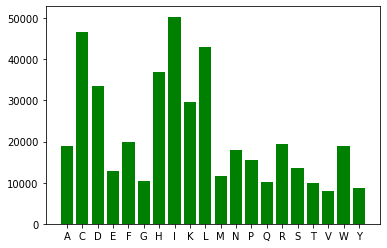

-------------Position  2 --------------
{'L': 40973, 'V': 35634, 'N': 8190, 'A': 34083, 'G': 49597, 'H': 8470, 'S': 35887, 'W': 20224, 'C': 15084, 'R': 50790, 'T': 18583, 'I': 9575, 'Y': 9139, 'Q': 12418, 'P': 21430, 'F': 9981, 'E': 17742, 'K': 14279, 'M': 13393, 'D': 10098}


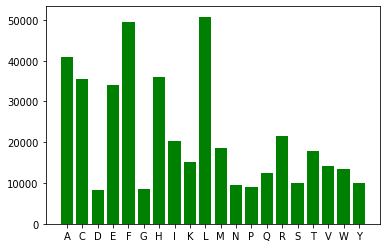

-------------Position  3 --------------
{'V': 36918, 'K': 14446, 'A': 33032, 'S': 34751, 'G': 52941, 'C': 15677, 'L': 40436, 'F': 9984, 'T': 17463, 'P': 16693, 'N': 7846, 'E': 17914, 'R': 52744, 'M': 13648, 'W': 21264, 'D': 10041, 'Q': 12726, 'H': 8333, 'Y': 9113, 'I': 9600}


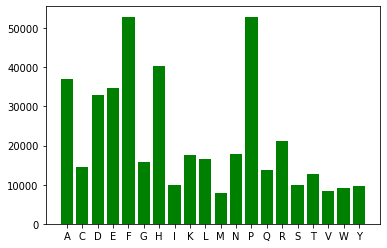

-------------Position  4 --------------
{'G': 55111, 'P': 15685, 'V': 37872, 'L': 38597, 'D': 10665, 'Y': 9064, 'M': 13730, 'S': 33027, 'T': 16833, 'A': 33247, 'R': 51936, 'W': 22434, 'F': 10967, 'I': 9702, 'Q': 12158, 'K': 14615, 'C': 15401, 'N': 7968, 'E': 18707, 'H': 7851}


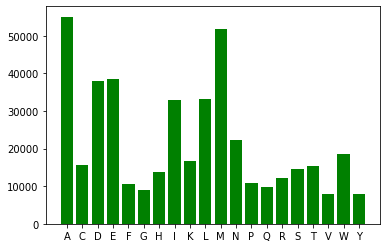

-------------Position  5 --------------
{'G': 55275, 'F': 10673, 'V': 39035, 'Q': 11405, 'A': 32468, 'M': 14122, 'L': 39572, 'P': 14791, 'S': 31691, 'Y': 8800, 'E': 18032, 'R': 53180, 'W': 23700, 'H': 7577, 'T': 17002, 'K': 14620, 'I': 10008, 'C': 15782, 'D': 10326, 'N': 7511}


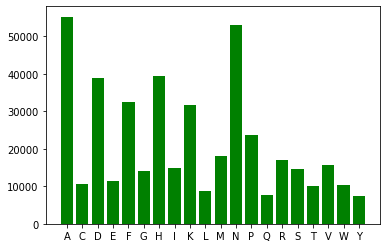

-------------Position  6 --------------
{'A': 33480, 'S': 29053, 'M': 12891, 'W': 23905, 'P': 14056, 'R': 53660, 'G': 67479, 'L': 37646, 'F': 9948, 'Y': 7999, 'E': 20217, 'V': 40120, 'K': 12038, 'Q': 9938, 'I': 8934, 'H': 6344, 'T': 15652, 'D': 10067, 'C': 15464, 'N': 6679}


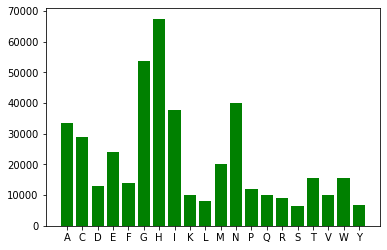

-------------Position  7 --------------
{'G': 70468, 'D': 11599, 'W': 23068, 'Q': 10827, 'V': 40039, 'I': 10109, 'P': 12810, 'E': 18765, 'L': 34718, 'S': 31809, 'R': 53788, 'K': 11400, 'A': 28119, 'C': 16123, 'H': 8714, 'F': 10530, 'T': 15559, 'M': 11713, 'Y': 8132, 'N': 7280}


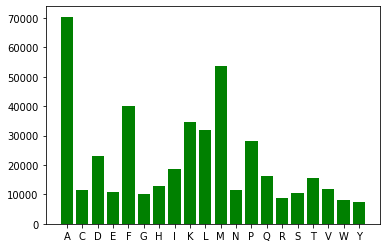

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


In [8]:
for i in range(1,8):
    char = dict()
    for p in set(all_peptides):
        if p[i] not in char:
            char[p[i]] = 1
        else:
            char[p[i]] += 1
    print("-------------Position ", i, "--------------")
    print(char)
    plt.bar(sorted(list(char.keys())), list(char.values()), color='g')
    plt.show()
print(sorted(list(char.keys())))

-------------Position  0 --------------
{'A': 151111, 'C': 133804, 'T': 155139, 'G': 117764}


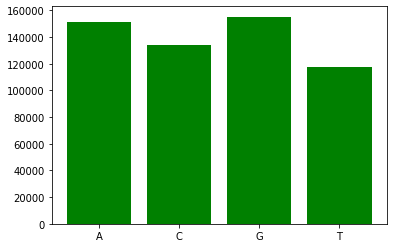

-------------Position  1 --------------
{'T': 157548, 'C': 137292, 'A': 147822, 'G': 115156}


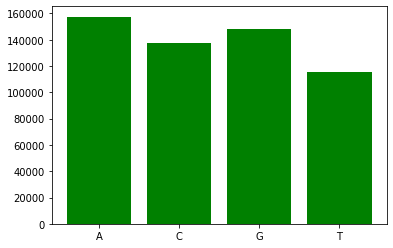

-------------Position  2 --------------
{'A': 146880, 'C': 136571, 'G': 116169, 'T': 158198}


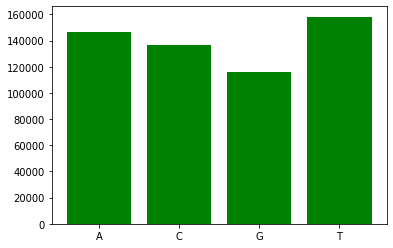

-------------Position  3 --------------
{'G': 117588, 'T': 160549, 'A': 145480, 'C': 134201}


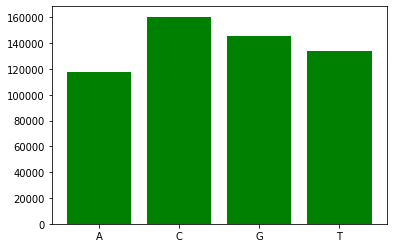

-------------Position  4 --------------
{'T': 158637, 'A': 145729, 'G': 115653, 'C': 137799}


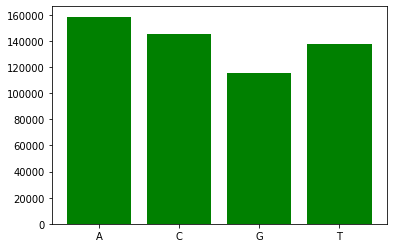

-------------Position  5 --------------
{'G': 113446, 'A': 144847, 'T': 158352, 'C': 141173}


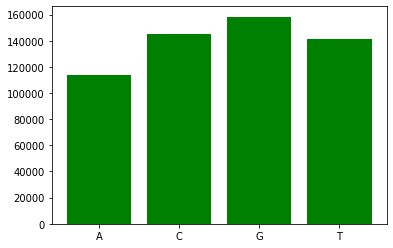

-------------Position  6 --------------
{'T': 160620, 'A': 144277, 'G': 118245, 'C': 134676}


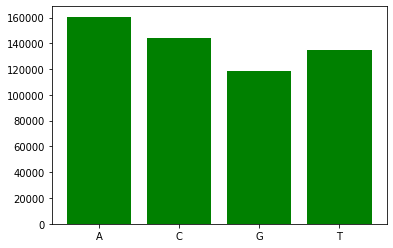

-------------Position  7 --------------
{'C': 137473, 'A': 145906, 'T': 159429, 'G': 115010}


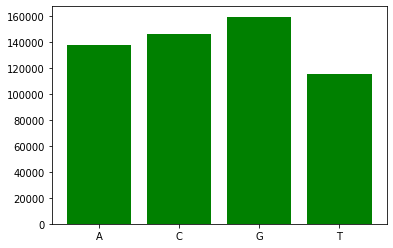

-------------Position  8 --------------
{'T': 160040, 'A': 144513, 'G': 114962, 'C': 138303}


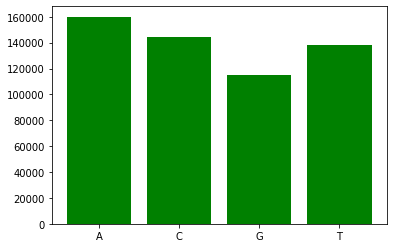

-------------Position  9 --------------
{'G': 116252, 'T': 161288, 'A': 143889, 'C': 136389}


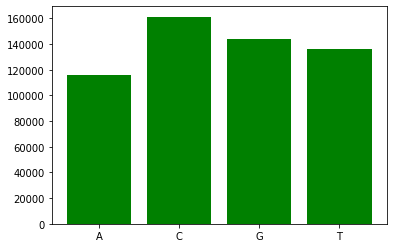

-------------Position  10 --------------
{'G': 115902, 'C': 137438, 'A': 145561, 'T': 158917}


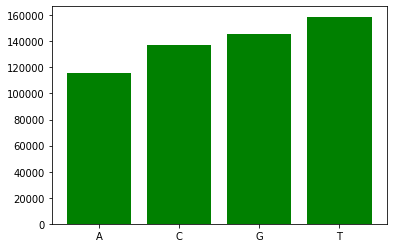

-------------Position  11 --------------
{'C': 138711, 'G': 114122, 'A': 144961, 'T': 160024}


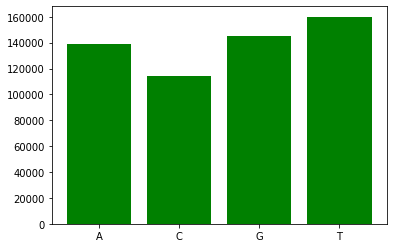

-------------Position  12 --------------
{'C': 134828, 'T': 163341, 'A': 143447, 'G': 116202}


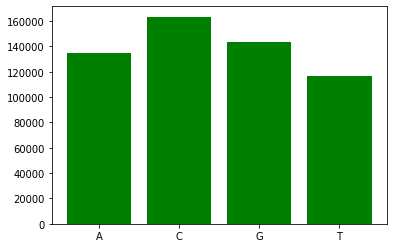

-------------Position  13 --------------
{'C': 138630, 'T': 161397, 'G': 113836, 'A': 143955}


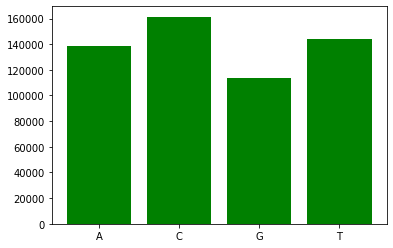

-------------Position  14 --------------
{'C': 138424, 'G': 114416, 'A': 143834, 'T': 161144}


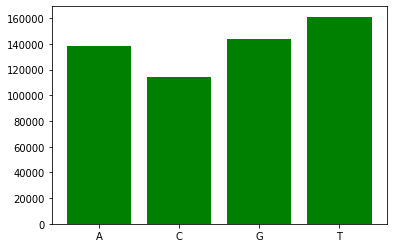

-------------Position  15 --------------
{'A': 143912, 'T': 161646, 'C': 137388, 'G': 114872}


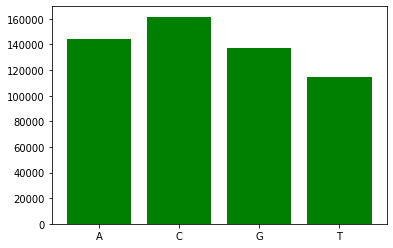

-------------Position  16 --------------
{'A': 144186, 'G': 115676, 'T': 160549, 'C': 137407}


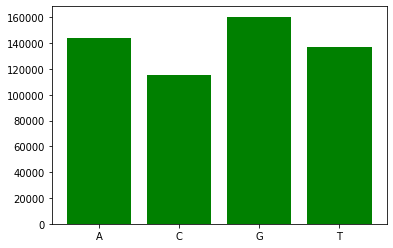

-------------Position  17 --------------
{'T': 161353, 'A': 143380, 'C': 136399, 'G': 116686}


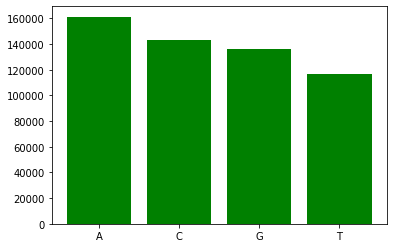

-------------Position  18 --------------
{'A': 143128, 'G': 116894, 'T': 164839, 'C': 132957}


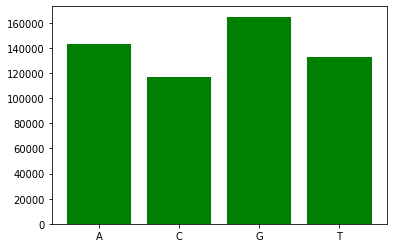

-------------Position  19 --------------
{'G': 111642, 'T': 168682, 'C': 134207, 'A': 143287}


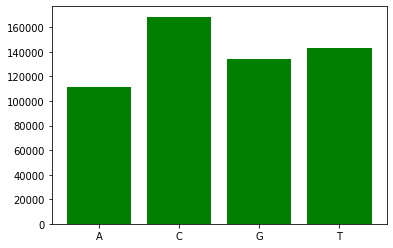

-------------Position  20 --------------
{'T': 156093, 'G': 108951, 'A': 154847, 'C': 137927}


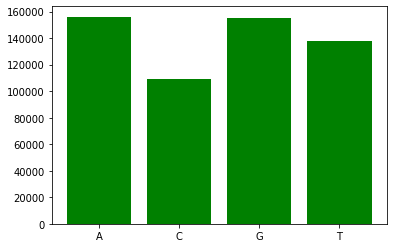

-------------Position  21 --------------
{'C': 138933, 'T': 152359, 'G': 108246, 'A': 158280}


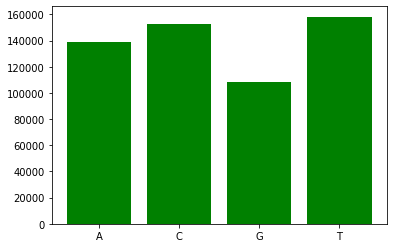

-------------Position  22 --------------
{'A': 146602, 'C': 139321, 'G': 113536, 'T': 158359}


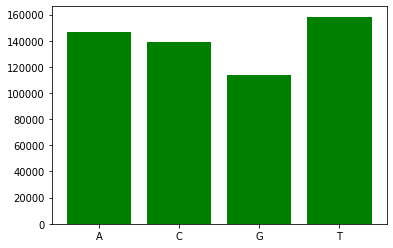

-------------Position  23 --------------
{'C': 139470, 'G': 113617, 'T': 158142, 'A': 146589}


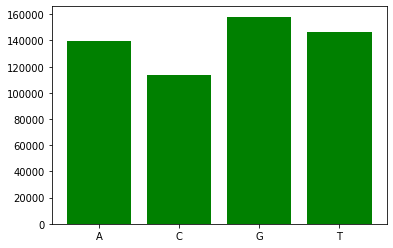

-------------Position  24 --------------
{'A': 139804, 'T': 160866, 'G': 123090, 'C': 134058}


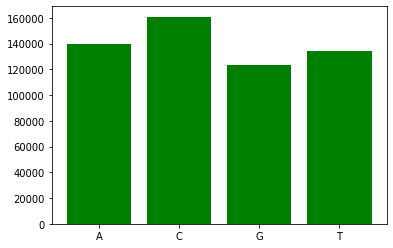

-------------Position  25 --------------
{'C': 136351, 'T': 158734, 'G': 112050, 'A': 150683}


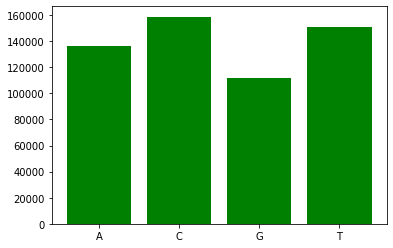

-------------Position  26 --------------
{'T': 154036, 'G': 111990, 'C': 135156, 'A': 156636}


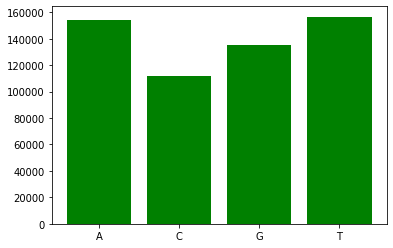

-------------Position  27 --------------
{'T': 161187, 'G': 114887, 'C': 136744, 'A': 145000}


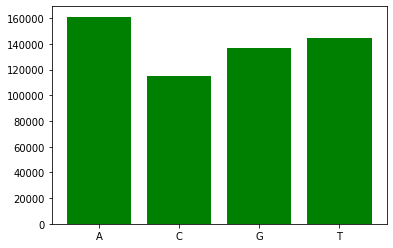

-------------Position  28 --------------
{'T': 159337, 'A': 146800, 'G': 116387, 'C': 135294}


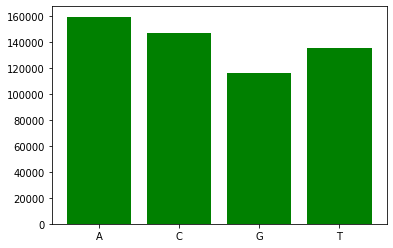

-------------Position  29 --------------
{'G': 115567, 'T': 159863, 'A': 147822, 'C': 134566}


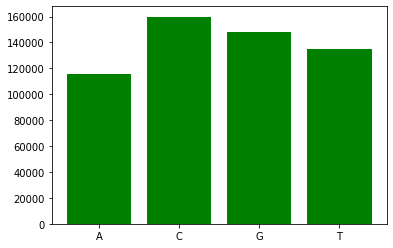

-------------Position  30 --------------
{'C': 132532, 'G': 116291, 'A': 139405, 'T': 169590}


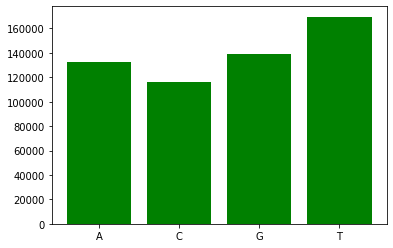

-------------Position  31 --------------
{'T': 168344, 'A': 141502, 'C': 134748, 'G': 113224}


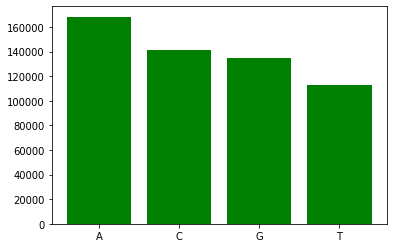

-------------Position  32 --------------
{'C': 137824, 'G': 110545, 'A': 142333, 'T': 167116}


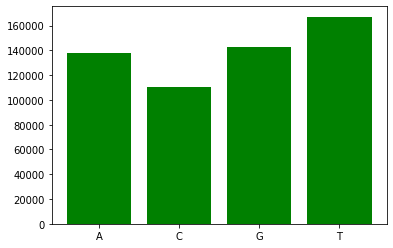

-------------Position  33 --------------
{'C': 138081, 'G': 111628, 'T': 164628, 'A': 143481}


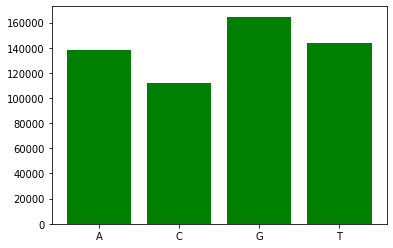

-------------Position  34 --------------
{'T': 166088, 'A': 138718, 'C': 134397, 'G': 118615}


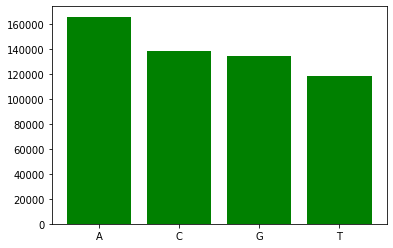

-------------Position  35 --------------
{'T': 165944, 'A': 139524, 'C': 134850, 'G': 117500}


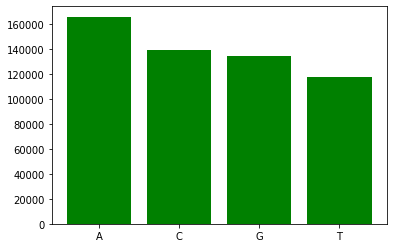

-------------Position  36 --------------
{'A': 140040, 'C': 137548, 'G': 117124, 'T': 163106}


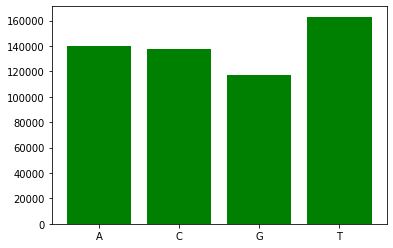

-------------Position  37 --------------
{'T': 165087, 'A': 142023, 'C': 130591, 'G': 120117}


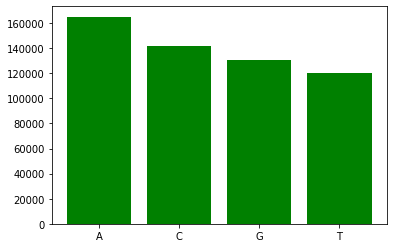

-------------Position  38 --------------
{'A': 141740, 'T': 164223, 'G': 123568, 'C': 128287}


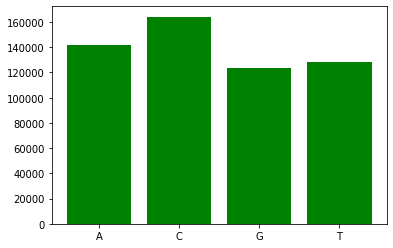

-------------Position  39 --------------
{'G': 110362, 'C': 136069, 'T': 169745, 'A': 141642}


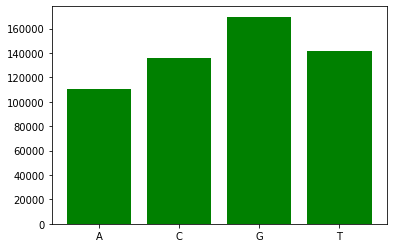

['A', 'C', 'G', 'T']


In [9]:
for i in range(40):
    char = dict()
    for a in set(all_aptamers):
        if a[i] not in char:
            char[a[i]] = 1
        else:
            char[a[i]] += 1
    print("-------------Position ", i, "--------------")
    print(char)
    plt.bar(sorted(list(char.keys())), list(char.values()), color='g')
    plt.show()
print(sorted(char.keys()))

## Test pairwise interactions 

In [22]:
na_list = ['A', 'C', 'G', 'T']
aa_list = ['R', 'L', 'S', 'A', 'G', 'P', 'T', 'V', 'N', 'D', 'C', 'Q', 'E', 'H', 'I', 'K', 'M', 'F', 'W', 'Y']
num_samples = 1000


# Generate uniform random samples without replacement
def get_samples(kind="pep",num=num_samples):
    if kind == "apt":
        samples = [all_aptamers[i] for i in np.random.choice(len(all_aptamers), num_samples, replace=False)]
    else:
        samples = [all_peptides[i] for i in np.random.choice(len(all_peptides), num_samples, replace=False)]
    return samples


# Index list for pairwise interaction
def get_index(kind="pep"):
    index = []
    if kind == "apt":
        a = np.random.choice(40, 40, replace=False)
        for i in range(0,40,2):
            index.append((a[i],a[(i+1)]))
    else:
        for i in range(1,7):
            for j in range(1,7):
                if i+j >= 8:
                    continue
                index.append((i, (i+j)))
    return index


# Plot matrix of relative probabilities
def get_pair_mat(kind="pep"):
    char_list = na_list if kind == "apt" else aa_list
    dim = len(char_list)
    index = get_index(kind)
    samples = get_samples(kind)
    M = np.zeros((dim,dim))
    # Loop through all possible pairwise combination
    for (i,j) in index:
        for s in samples:
            M[char_list.index(s[i]), char_list.index(s[j])] += 1
            M[char_list.index(s[j]), char_list.index(s[i])] += 1
        print("-----------Positions: ",(i,j),"Heatmap of probability matrix: ---------")
        M = np.true_divide(M, num_samples)
        ct = 2/(dim**2)
        mat = sns.heatmap(M,center=ct)
        plt.show()
        

# Plot matrix of relative probabilities, assume independence
def get_indep_mat(kind="pep"):
    char_list = na_list if kind == "apt" else aa_list
    dim = len(char_list)
    index = get_index(kind)
    samples = get_samples(kind)
    # Loop through all possible pairwise combination
    for (i,j) in index:
        # Create dict to count num of each letter
        i_char, j_char = dict.fromkeys(char_list, 0), dict.fromkeys(char_list, 0)
        for s in samples:
            if s[i] in i_char:
                i_char[s[i]] += 1
            if s[j] in j_char:
                j_char[s[j]] += 1
        # Initialize matrix of relative probabilities
        M = np.zeros((dim,dim))
        for r in range(dim):
            for c in range(dim):
                # Each entry in M is the product of their relative probabilities
                M[r,c] = (i_char[char_list[r]] * j_char[char_list[c]])/(num_samples**2)
        print("-----------Positions: ",(i,j),"Heatmap of probability matrix: ---------")
        p_range = 4/(dim**2)
        mat = sns.heatmap(M, vmin=0, vmax=p_range)
        plt.show()

-----------Positions:  (1, 2) Heatmap of probability matrix: ---------


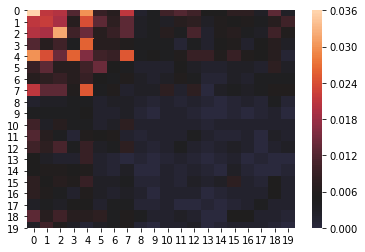

-----------Positions:  (1, 3) Heatmap of probability matrix: ---------


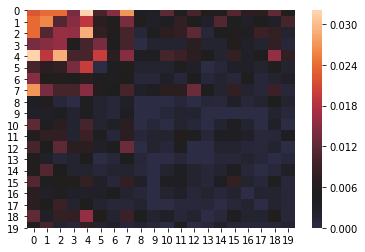

-----------Positions:  (1, 4) Heatmap of probability matrix: ---------


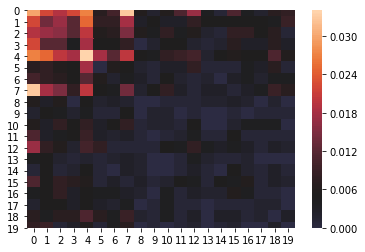

-----------Positions:  (1, 5) Heatmap of probability matrix: ---------


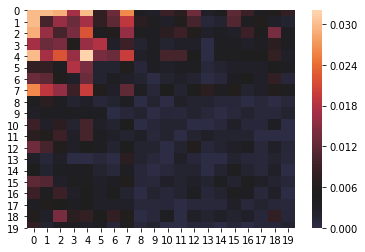

-----------Positions:  (1, 6) Heatmap of probability matrix: ---------


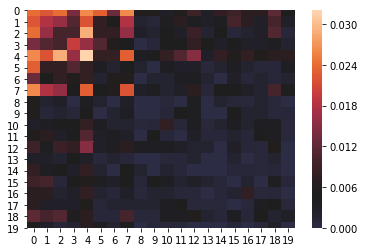

-----------Positions:  (1, 7) Heatmap of probability matrix: ---------


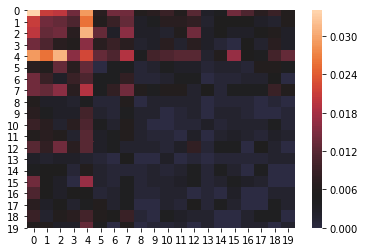

-----------Positions:  (2, 3) Heatmap of probability matrix: ---------


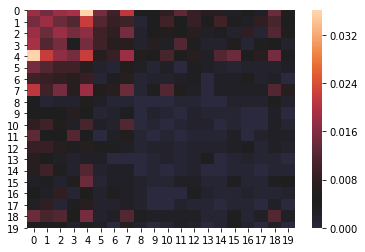

-----------Positions:  (2, 4) Heatmap of probability matrix: ---------


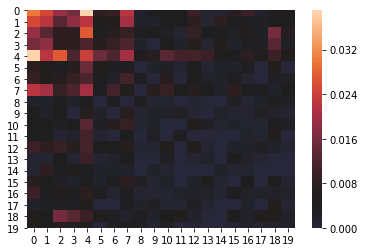

-----------Positions:  (2, 5) Heatmap of probability matrix: ---------


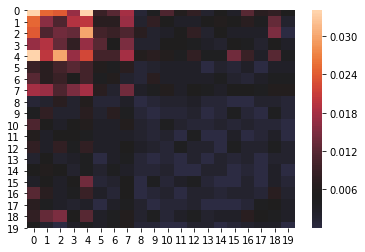

-----------Positions:  (2, 6) Heatmap of probability matrix: ---------


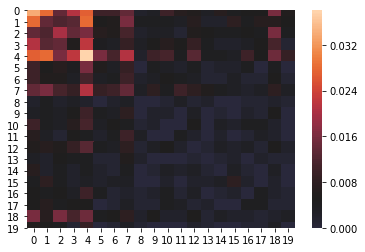

-----------Positions:  (2, 7) Heatmap of probability matrix: ---------


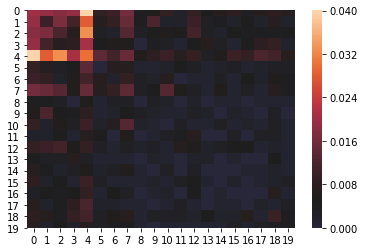

-----------Positions:  (3, 4) Heatmap of probability matrix: ---------


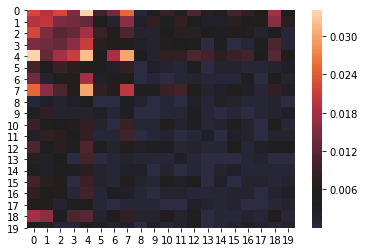

-----------Positions:  (3, 5) Heatmap of probability matrix: ---------


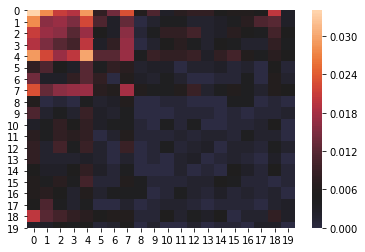

-----------Positions:  (3, 6) Heatmap of probability matrix: ---------


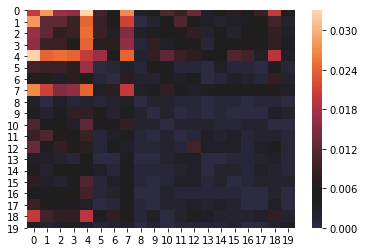

-----------Positions:  (3, 7) Heatmap of probability matrix: ---------


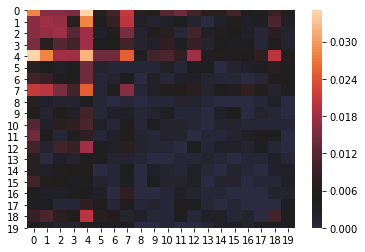

-----------Positions:  (4, 5) Heatmap of probability matrix: ---------


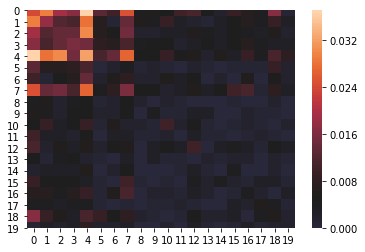

-----------Positions:  (4, 6) Heatmap of probability matrix: ---------


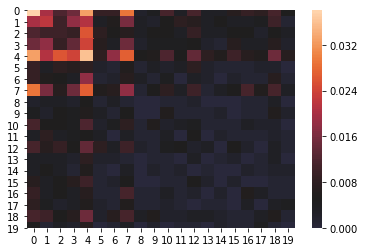

-----------Positions:  (4, 7) Heatmap of probability matrix: ---------


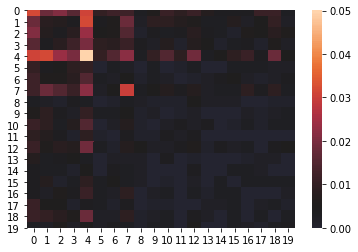

-----------Positions:  (5, 6) Heatmap of probability matrix: ---------


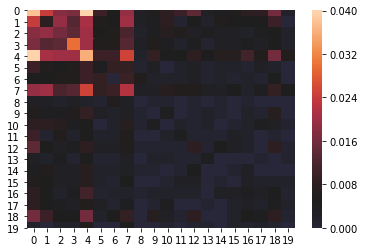

-----------Positions:  (5, 7) Heatmap of probability matrix: ---------


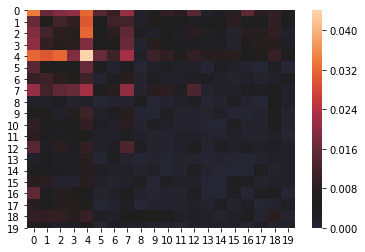

-----------Positions:  (6, 7) Heatmap of probability matrix: ---------


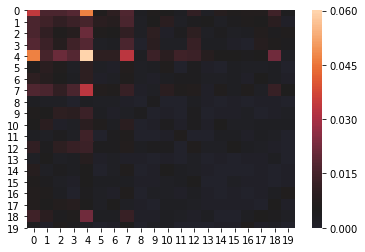

In [23]:
# Peptides, pair
get_pair_mat()

-----------Positions:  (1, 2) Heatmap of probability matrix: ---------


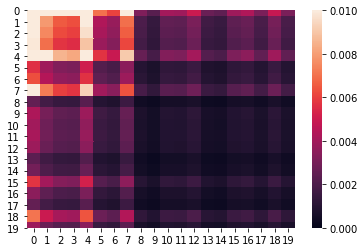

-----------Positions:  (1, 3) Heatmap of probability matrix: ---------


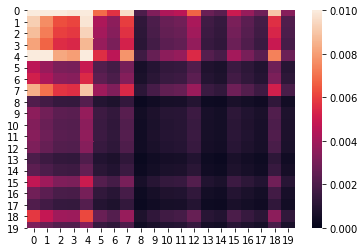

-----------Positions:  (1, 4) Heatmap of probability matrix: ---------


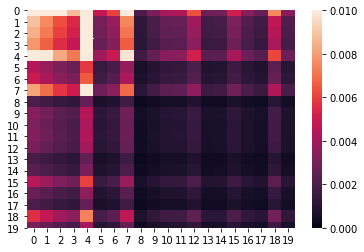

-----------Positions:  (1, 5) Heatmap of probability matrix: ---------


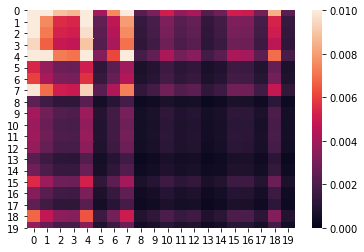

-----------Positions:  (1, 6) Heatmap of probability matrix: ---------


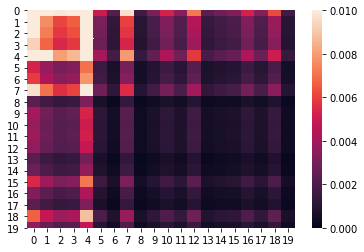

-----------Positions:  (1, 7) Heatmap of probability matrix: ---------


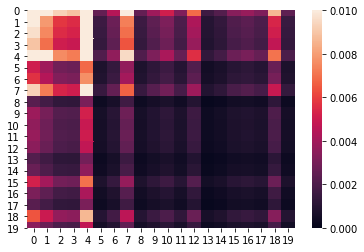

-----------Positions:  (2, 3) Heatmap of probability matrix: ---------


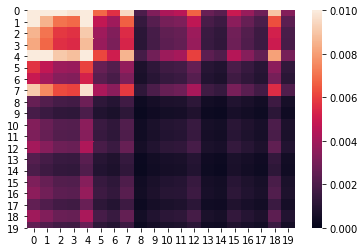

-----------Positions:  (2, 4) Heatmap of probability matrix: ---------


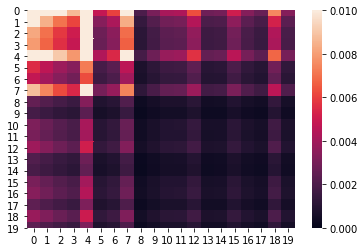

-----------Positions:  (2, 5) Heatmap of probability matrix: ---------


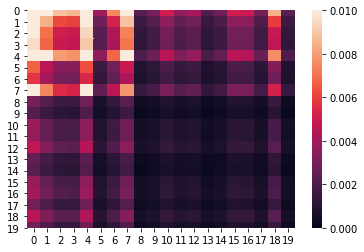

-----------Positions:  (2, 6) Heatmap of probability matrix: ---------


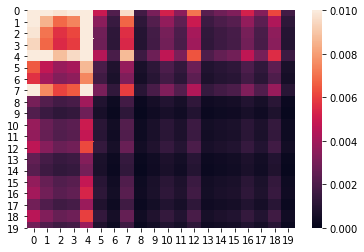

-----------Positions:  (2, 7) Heatmap of probability matrix: ---------


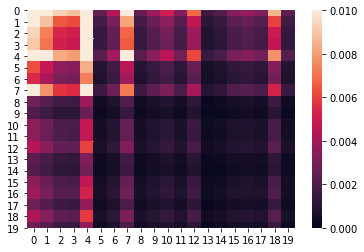

-----------Positions:  (3, 4) Heatmap of probability matrix: ---------


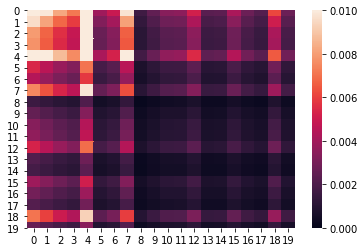

-----------Positions:  (3, 5) Heatmap of probability matrix: ---------


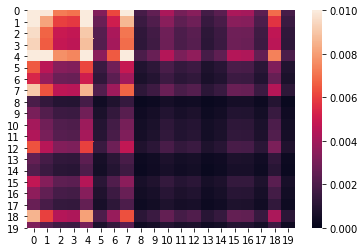

-----------Positions:  (3, 6) Heatmap of probability matrix: ---------


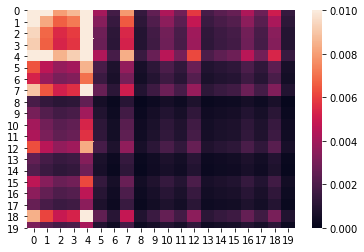

-----------Positions:  (3, 7) Heatmap of probability matrix: ---------


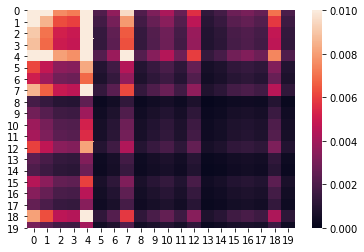

-----------Positions:  (4, 5) Heatmap of probability matrix: ---------


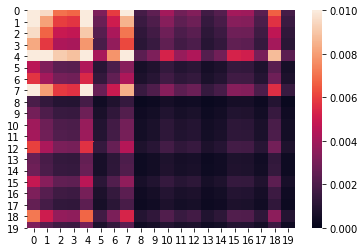

-----------Positions:  (4, 6) Heatmap of probability matrix: ---------


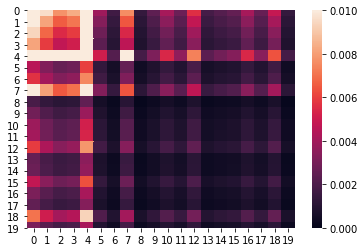

-----------Positions:  (4, 7) Heatmap of probability matrix: ---------


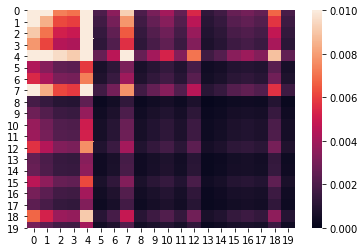

-----------Positions:  (5, 6) Heatmap of probability matrix: ---------


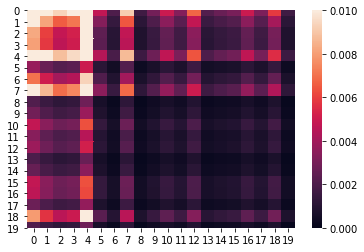

-----------Positions:  (5, 7) Heatmap of probability matrix: ---------


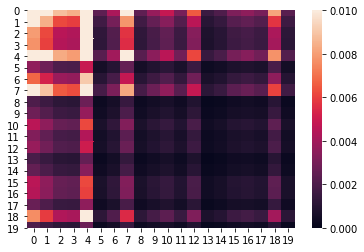

-----------Positions:  (6, 7) Heatmap of probability matrix: ---------


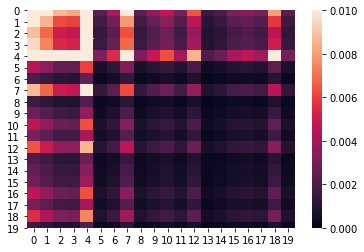

In [24]:
# Peptides, independence
get_indep_mat()

-----------Positions:  (30, 27) Heatmap of probability matrix: ---------


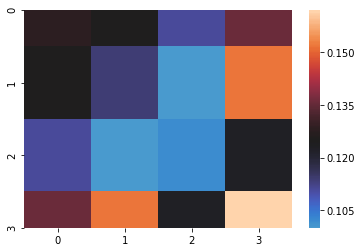

-----------Positions:  (12, 22) Heatmap of probability matrix: ---------


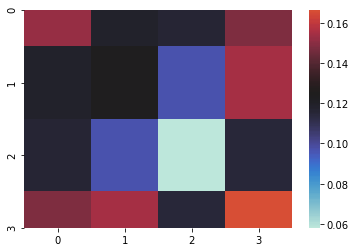

-----------Positions:  (31, 8) Heatmap of probability matrix: ---------


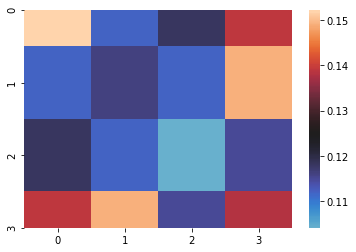

-----------Positions:  (9, 29) Heatmap of probability matrix: ---------


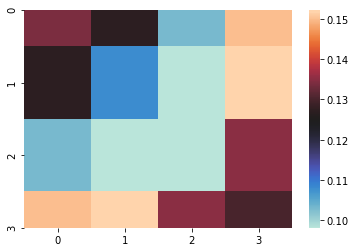

-----------Positions:  (16, 15) Heatmap of probability matrix: ---------


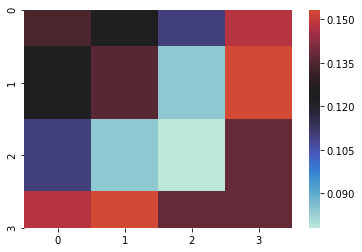

-----------Positions:  (4, 21) Heatmap of probability matrix: ---------


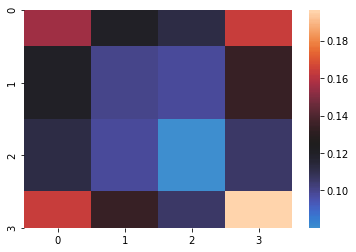

-----------Positions:  (37, 24) Heatmap of probability matrix: ---------


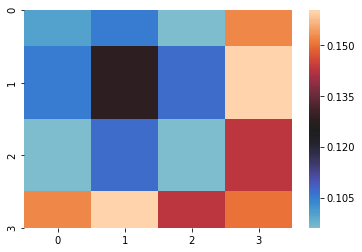

-----------Positions:  (35, 7) Heatmap of probability matrix: ---------


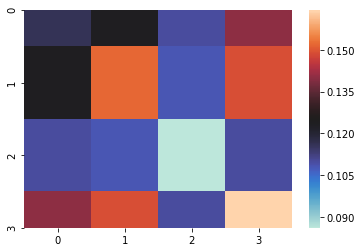

-----------Positions:  (10, 39) Heatmap of probability matrix: ---------


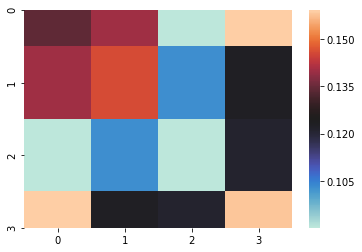

-----------Positions:  (1, 3) Heatmap of probability matrix: ---------


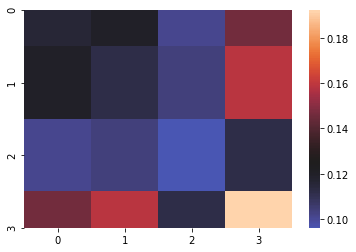

-----------Positions:  (11, 32) Heatmap of probability matrix: ---------


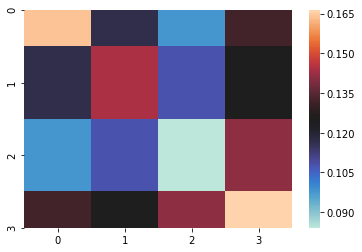

-----------Positions:  (25, 23) Heatmap of probability matrix: ---------


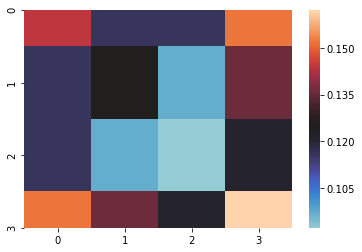

-----------Positions:  (20, 18) Heatmap of probability matrix: ---------


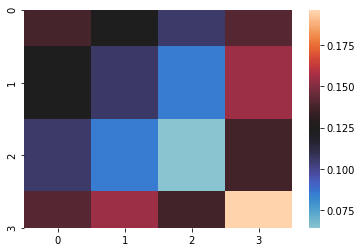

-----------Positions:  (28, 36) Heatmap of probability matrix: ---------


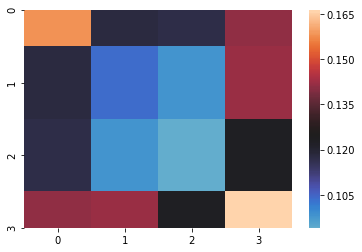

-----------Positions:  (33, 13) Heatmap of probability matrix: ---------


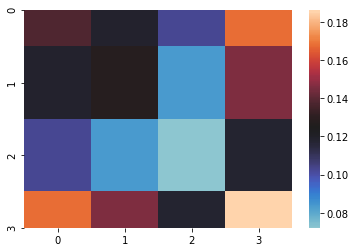

-----------Positions:  (2, 14) Heatmap of probability matrix: ---------


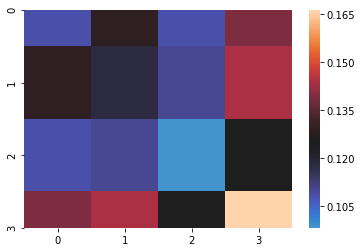

-----------Positions:  (26, 19) Heatmap of probability matrix: ---------


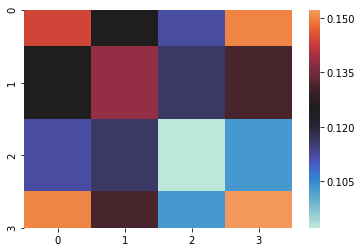

-----------Positions:  (5, 6) Heatmap of probability matrix: ---------


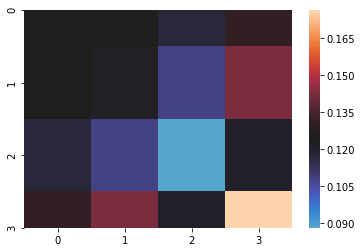

-----------Positions:  (0, 38) Heatmap of probability matrix: ---------


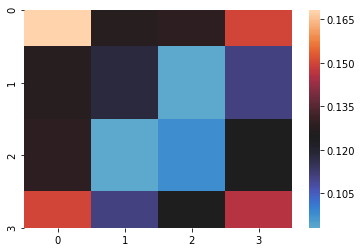

-----------Positions:  (17, 34) Heatmap of probability matrix: ---------


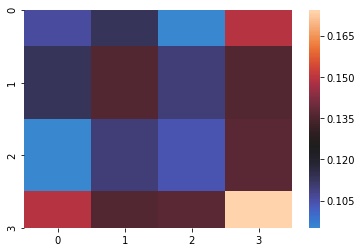

In [25]:
# Aptamers, pair
get_pair_mat("apt")

-----------Positions:  (39, 14) Heatmap of probability matrix: ---------


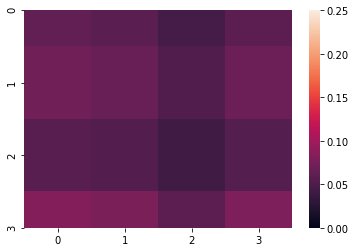

-----------Positions:  (18, 8) Heatmap of probability matrix: ---------


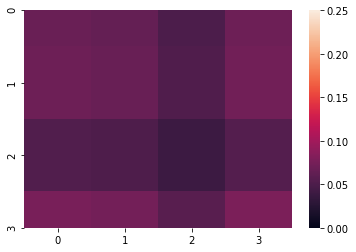

-----------Positions:  (23, 36) Heatmap of probability matrix: ---------


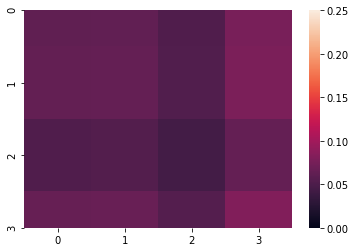

-----------Positions:  (16, 27) Heatmap of probability matrix: ---------


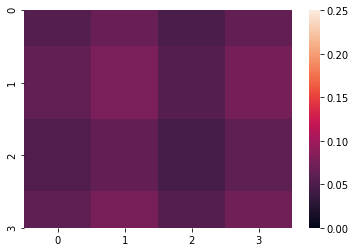

-----------Positions:  (7, 0) Heatmap of probability matrix: ---------


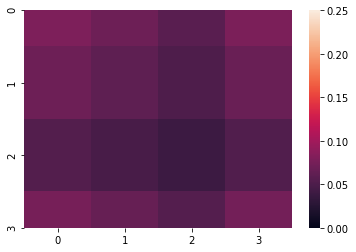

-----------Positions:  (6, 13) Heatmap of probability matrix: ---------


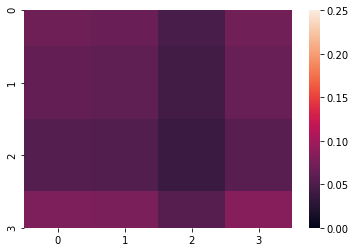

-----------Positions:  (34, 33) Heatmap of probability matrix: ---------


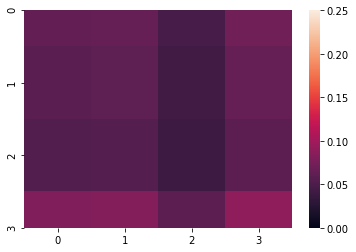

-----------Positions:  (20, 30) Heatmap of probability matrix: ---------


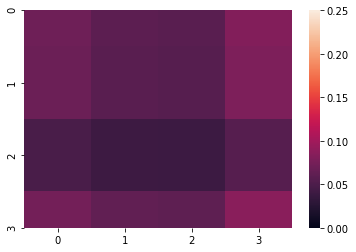

-----------Positions:  (5, 26) Heatmap of probability matrix: ---------


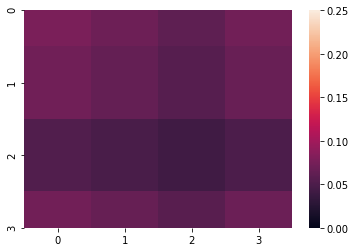

-----------Positions:  (15, 28) Heatmap of probability matrix: ---------


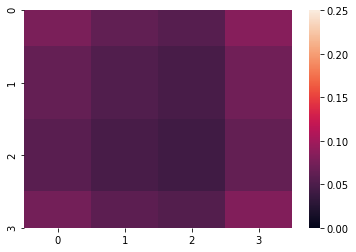

-----------Positions:  (2, 31) Heatmap of probability matrix: ---------


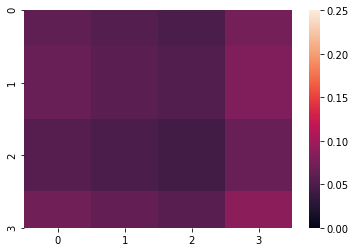

-----------Positions:  (35, 38) Heatmap of probability matrix: ---------


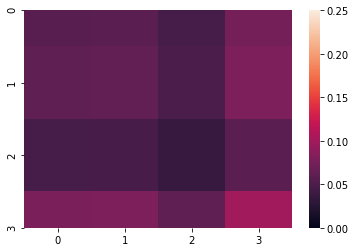

-----------Positions:  (11, 1) Heatmap of probability matrix: ---------


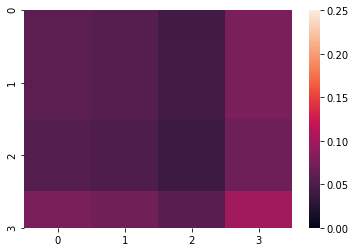

-----------Positions:  (24, 21) Heatmap of probability matrix: ---------


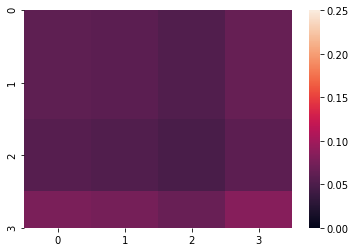

-----------Positions:  (37, 12) Heatmap of probability matrix: ---------


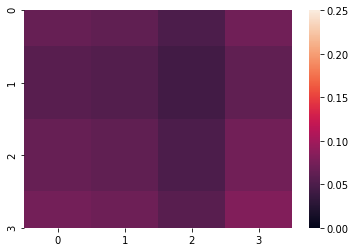

-----------Positions:  (22, 25) Heatmap of probability matrix: ---------


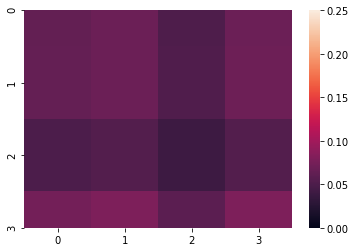

-----------Positions:  (29, 10) Heatmap of probability matrix: ---------


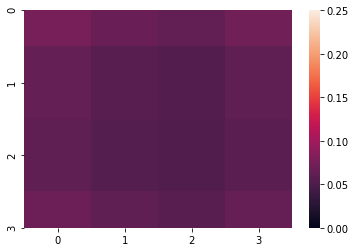

-----------Positions:  (4, 9) Heatmap of probability matrix: ---------


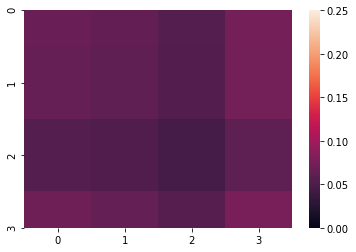

-----------Positions:  (19, 17) Heatmap of probability matrix: ---------


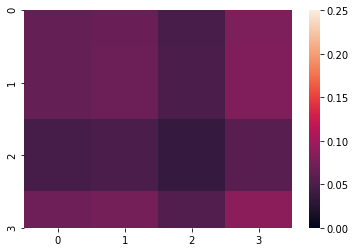

-----------Positions:  (3, 32) Heatmap of probability matrix: ---------


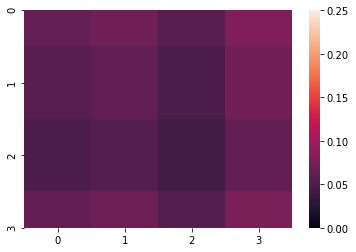

In [26]:
# Aptamers, independence
get_indep_mat("apt")